<a href="https://colab.research.google.com/github/Biel-PS/AdvancedFluidMechanics/blob/BielPS/3-Turbulence/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 : Computation of length scales and spectrum in space

We have fluctuations of velocity in time, but not in space. In order to get fluctuations of velocity in space (for a given time $t_0$) we should have an array of anemometers very close to each other (microns, probably), which is quite difficult (it is much more easier for CFD results).

Fortunately, there is the [Taylor hypothesis](https://www-sciencedirect-com.recursos.biblioteca.upc.edu/science/article/pii/B9780080443508500014#p15) (see also Pope's book reference at the beginning of the chapter, p. 223), which says that if turbulence can be considered (average) steady and fluctuations are much smaller than average velocity, time can be replaced by $x/\overline{u}$. The we can estimate the lenght scales of turbulence by replacing $t$ by $x$ and frequency $f$ by wavenumber $k$ (do not confuse with turbulent kinetic energy).

In this assignment it is proposed to to make all the previous analysis and find, in space:

- Kolmogorov's scale
- Autocorrelation function
- Integral scale
- Power spectrum (in $k$) and check the Kolmogorov's power law.

Do not do that for $y = 0 \,\text{mm}$. Choose another $y$ !

Re_t = 4.3308e+05
Re_t = 24332


<ipython-input-41-e789218c68f6>:16: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  turbulenceData.to_hdf("TurbVel.hdf","w")


'time scale ORIGINAL = 0.0012334840317132275'

'length scale ORIGINAL = 0.0001360230145074664'

'length scale APROXIMATED = 1.6426348918750895e-05'

<Axes: title={'center': 'Turbulence Intensity'}, xlabel='Lag', ylabel='Autocorrelation'>

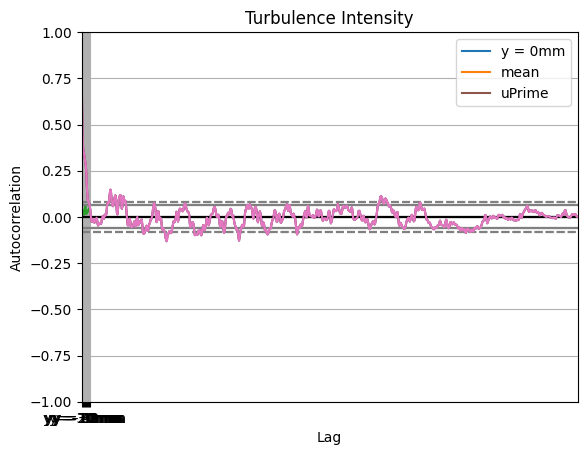

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
columns = []

yVal = "y = 0mm"

for i in range(17):
    y = (i-8)*5
    columns.append("y = "+str(y)+"mm")


turbulenceData = pd.read_csv('TurbVel.csv',delimiter=',', index_col=0,names=columns)
turbulenceData.index.name="Time"
turbulenceData.head()
turbulenceData.to_hdf("TurbVel.hdf","w")

# display(turbulenceData)

turbulenceData[yVal].plot(ylabel="u")
statData = turbulenceData.describe()

# display(statData)

statData.loc["mean"].plot(title="Mean velocities")
turbIntensity = statData.loc["std"]/statData.loc["mean"]
turbIntensity.plot(title="Turbulence Intensity")
turbVelFluct = turbulenceData-statData.loc["mean"]
#turbVelFluct.plot(subplots=True,layout=(4,5),figsize=(20,20),color="b",sharey=True);
TKE_lengthScale = 1.5*(statData.loc["std"]*statData.loc["mean"])**2
TKE_lengthScale.plot()
k = TKE_lengthScale.loc[yVal]
k
nu = 1.5e-5 # m^2/s
c = 0.265 # m
Re_t = np.sqrt(k)*c/nu
print('Re_t = {:.5g}'.format(Re_t))
epsilon = k**1.5/c
epsilon # m^2/s^3

TKE = 1.5*(statData.loc["std"])**2
k = TKE.loc[yVal]
k
nu = 1.5e-5 # m^2/s
c = 0.265 # m
Re_t = np.sqrt(k)*c/nu
print('Re_t = {:.5g}'.format(Re_t))
epsilon2 = k**1.5/c
epsilon2 # m^2/s^3

tau_k = np.sqrt(nu/epsilon2)
display("time scale ORIGINAL = " + str(tau_k))

uPrime = turbVelFluct[yVal].values
pd.plotting.autocorrelation_plot(uPrime);


lengthScale_ORIGINAL = (nu**3/epsilon2)**(1/4)
display("length scale ORIGINAL = " + str(lengthScale_ORIGINAL))

lengthScale_APROXIMATED = np.sqrt(nu/epsilon)
display("length scale APROXIMATED = " + str(lengthScale_APROXIMATED))


uPrime = turbVelFluct[yVal].values*statData.loc["mean"][yVal]
uPrime2 = turbVelFluct[yVal].values
pd.plotting.autocorrelation_plot(uPrime,label="uPrime");
pd.plotting.autocorrelation_plot(uPrime2)

#autocorr = pd.plotting.autocorrelation_plot(uPrime).get_lines()[5].get_xydata()
# autocorr[:,0]=turbVelFluct.index.values


In [ ]:
lengthScale = (nu**3/epsilon)**(1/4) * statData.loc["mean"]
display(lengthScale)

,mean
y = -40mm,0.002871
y = -35mm,0.002863
y = -30mm,0.002823
y = -25mm,0.002764
y = -20mm,0.002754
y = -15mm,0.002757
y = -10mm,0.002684
y = -5mm,0.002652
y = 0mm,0.002421
y = 5mm,0.002321


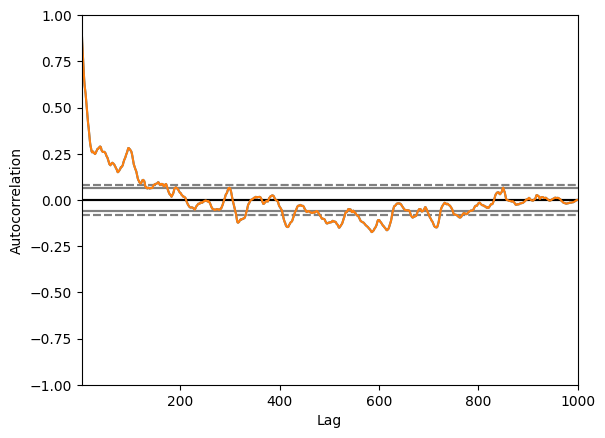

In [32]:
uPrime = turbVelFluct[yVal].values*statData.loc["mean"][yVal]
pd.plotting.autocorrelation_plot(uPrime);
autocorr = pd.plotting.autocorrelation_plot(uPrime).get_lines()[5].get_xydata()
# autocorr[:,0]=turbVelFluct.index.values


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00


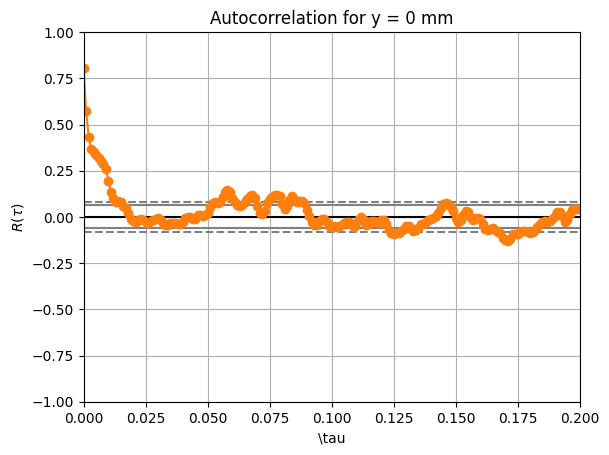

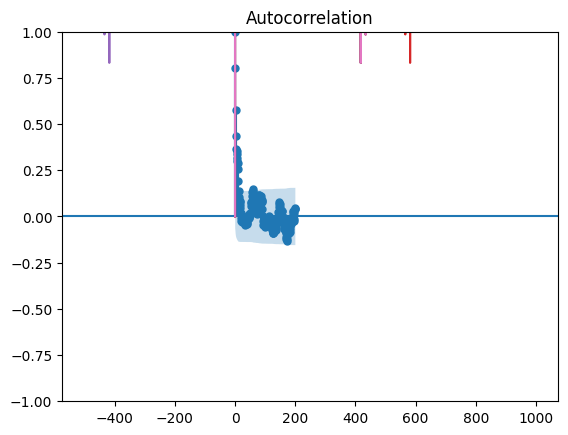

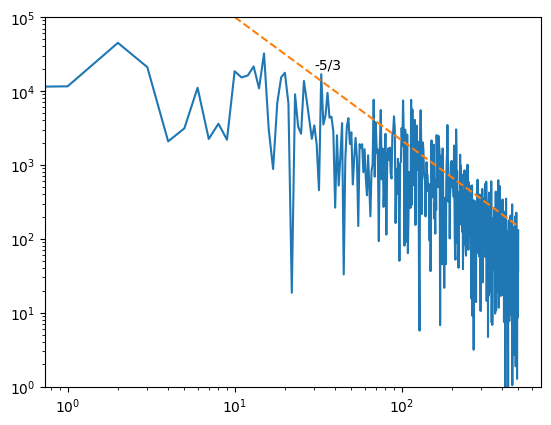

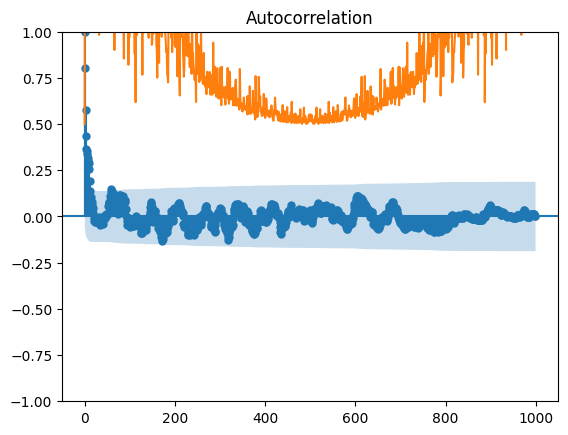

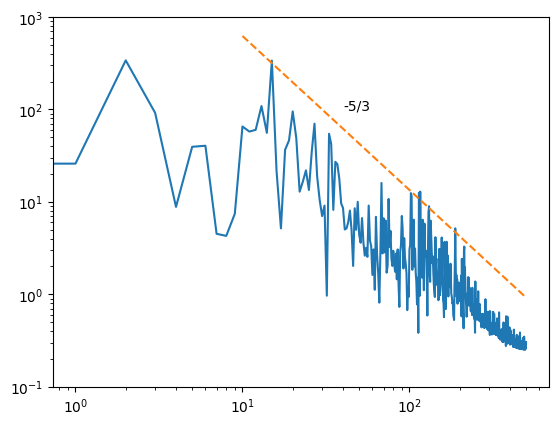

In [ ]:
autocorr = pd.plotting.autocorrelation_plot(uPrime).get_lines()[5].get_xydata()
autocorr[:,0]=turbVelFluct.index.values
import matplotlib.pyplot as plt
plt.plot(autocorr[:,0],autocorr[:,1],'o-')
ax = plt.gca()
ax.set_xlim(0,0.2)
ax.set_ylabel(r"$R(\tau)$")
ax.set_xlabel(r"\tau")
ax.set_title("Autocorrelation for y = 0 mm");
from scipy import integrate
T = integrate.trapezoid(autocorr[:,1],autocorr[:,0]) * statData.loc["mean"]
import statsmodels.api as sm
rho = sm.tsa.acf(uPrime,nlags=50,fft=False)
import statsmodels.graphics.api as smg
smg.tsa.plot_acf(uPrime,lags=200,fft=False)
T = integrate.trapezoid(rho[0:50],autocorr[0:50,0])
import scipy.stats as stats
X = stats.norm(0,statData["y = 0mm"].loc["std"])
X_samples= X.rvs(1000)
F, bins, patches = plt.hist(uPrime,bins=100,density=True) # Integral = 1
plt.hist(X_samples,bins=100,density=True);
deltaUPrime = np.diff(bins)
M0 = np.sum(F*deltaUPrime)
UPrimePDF = bins[:-1] + deltaUPrime/2
M1 = np.sum(UPrimePDF*F*deltaUPrime)
M2 = np.sum(UPrimePDF**2*F*deltaUPrime)
M3 = np.sum(UPrimePDF**3*F*deltaUPrime)
S = M3/M2**1.5
M4 = np.sum(UPrimePDF**4*F*deltaUPrime)
K = M4/M2**2
E = np.abs(np.fft.fft(uPrime))
plt.plot(E);
freq = np.fft.fftfreq(uPrime.size,0.001)
plt.plot(freq,E);
E = E[:len(E)//2]
freq = freq[:len(freq)//2]
plt.plot(freq,E);
P = E**2
plt.plot(freq,E)
fig, ax = plt.subplots(1)
ax.set_ylim(1,1e5)
ax.loglog(freq,P)
f_plot = np.logspace(1,2.7,100)
f_ref = 10 #Just a Frequancy and Energy of reference for the -5/3 law
P_ref = 1e5
P_plot = P_ref/f_ref**(-5/3)*f_plot**(-5/3)
ax.loglog(f_plot,P_plot,'--')
ax.text(30,20000,'-5/3');
rho = sm.tsa.acf(uPrime,nlags=999,fft=False)
smg.tsa.plot_acf(uPrime,lags=999,fft=False)
Pr = np.abs(np.fft.fft(rho))
plt.plot(Pr);
freq = np.fft.fftfreq(rho.size,0.001)
Pr = Pr[:int(len(Pr)/2)]**2
freq = freq[:int(len(freq)/2)]
fig, ax = plt.subplots(1)
ax.set_ylim(0.1,1000)
ax.loglog(freq,Pr)
f_plot = np.logspace(1,2.7,100)
f_ref = 30
P_ref = 100
P_plot = P_ref/f_ref**(-5/3)*f_plot**(-5/3)
ax.loglog(f_plot,P_plot,'--')
ax.text(40,100,'-5/3');
try:
    %load_ext watermark
except:
    !pip install watermark
